In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from newspaper import Article

ModuleNotFoundError: ignored

In [ ]:
!pip3 install newspaper3k

     |████████████████████████████████| 215kB 2.6MB/s 
     |████████████████████████████████| 81kB 6.0MB/s 
     |████████████████████████████████| 7.4MB 7.8MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=22cdf95a8fcfaba6f545b05be4c68e3b4822794cea853050edf49e6b47a1fca7
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=5311e75344bb123e662f89cfa50ce226ba61c57d63ba43bd565f4d454c7cdd36
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da20627c013f438ed34
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=c26f5db2ccd69de4a691ef6935e81ab8299764a035c2f917675fdda8daa8ac3f
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c75

In [ ]:
import scrapy

ModuleNotFoundError: ignored

In [ ]:
!pip install scrapy

     |████████████████████████████████| 245kB 2.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 3.1MB 8.8MB/s 
     |████████████████████████████████| 2.6MB 30.8MB/s 
     |████████████████████████████████| 3.2MB 46.7MB/s 
     |████████████████████████████████| 245kB 38.0MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-cp36-none-any.whl size=11517 sha256=d6652a666412a472ec70125044301a9982b20602e5a9b3e354f7f3c676b1bcb9
  Stored in directory: /root/.cache/pip/wheels/88/99/96/cfef6665f9cb1522ee6757ae5955feedf2fe25f1737f91fa7f
  Created wheel for protego: filename=Protego-0.1.16-cp36-none-any.whl size=7765 sha256=3fd1344741aad027f4a59f689e55263f89a2dc52fcb5a7eb626e3d08b350477d
  Stored in directory: /root/.cache/pip/wheels/51/01/d1/4a2286a976dccd025ba679acacfe37320540df0f2283ecab12
Successfully built PyDispatche

In [ ]:
url = ['https://timesofindia.indiatimes.com/life-style/food-news/follow-this-diet-to-keep-blood-pressure-in-check/articleshow/78845110.cms',
      'https://timesofindia.indiatimes.com/sports/hockey/top-stories/contributing-to-india-winning-olympic-medal-my-biggest-dream-vivek-sagar-prasad/articleshow/78854620.cms',
      'https://timesofindia.indiatimes.com/sports/football/epl/top-stories/epl-southampton-end-evertons-unbeaten-run-with-2-0-win/articleshow/78861368.cms',
      'https://timesofindia.indiatimes.com/business/india-business/franklin-mf-may-move-sc-on-fund-closures/articleshow/78863529.cms',
      'https://timesofindia.indiatimes.com/business/india-business/singapore-arbitration-rules-in-amazons-favour-puts-future-reliance-deal-on-hold/articleshow/78861689.cms']

In [ ]:
from newspaper import Article
import scrapy

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
article_list = []

for entry in url:
    article = Article(entry)
    article.download()
    article.parse()
    article.nlp()
    article_list.append(article.text)

In [ ]:
article_list

['Are you also consuming foods and drinks rich in flavanol? If yes, there are chances that you may suffer from lower blood pressure. According to a new study, people who consume a diet having flavanol-rich foods and drinks such as tea, apple and berry juice, could have lower blood pressure. The findings published in the journal \'Scientific Reports\' studied the diet of more than 25,000 people in the UK and compared the food they ate with their blood pressure.In contrast to most other studies investigating links between nutrition and health, the researchers measured flavanol intake objectively using nutritional biomarkers -- indicators of dietary intake, metabolism or nutritional status present in our blood.The difference in blood pressure between those with the lowest 10 per cent and the highest 10 per cent of flavonol intake was between two and four millimetres of mercury (mmHg).This is comparable to meaningful changes in blood pressure observed in those following a Mediterranean die

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words={'english'})
tfidf_vect = vectorizer.fit_transform(article_list)
article_list = vectorizer.fit_transform(article_list)

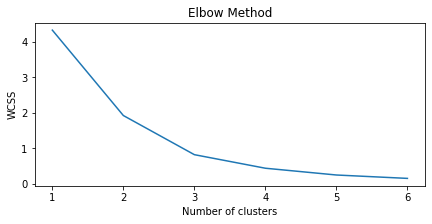

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    kmeans.fit(tfidf_vect.reshape(-1,1))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(7,3))
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

k = 3 
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=10, random_state=252)
model = model.fit(article_list)

In [ ]:
model.labels_

array([2, 0, 0, 1, 1], dtype=int32)

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
features = vectorizer.get_feature_names()

In [ ]:
for i in model.labels_:
    if i == 0:
        for index in order_centroids[i]:
            print(index, features[index])

673 the
684 to
42 and
309 he
723 we
464 of
336 in
233 everton
320 his
666 team
622 southampton
322 hockey
740 with
264 for
359 is
721 was
284 goal
444 my
747 year
513 prasad
416 me
279 game
730 when
304 has
467 olympic
420 medal
36 am
247 fih
64 at
529 prowse
720 ward
306 have
423 men
77 be
672 that
686 tokyo
714 very
429 midfielder
81 been
739 winning
540 really
736 win
159 confidence
504 played
361 it
339 india
683 time
13 about
589 scoring
682 through
590 season
607 side
113 came
78 beat
397 lot
688 took
26 after
577 saints
363 james
224 effort
609 sigurdsson
195 defender
20 adams
104 box
345 ings
41 ancelotti
642 striker
287 good
285 goals
433 minutes
500 pickford
477 our
576 said
21 added
35 always
340 indian
28 against
711 us
272 from
469 on
283 go
203 didn
256 first
470 one
465 off
59 as
735 will
726 well
127 certainly
292 great
482 part
376 last
335 improve
634 start
717 vivek
165 consistent
613 singh
599 series
173 contributing
408 manpreet
409 many
250 finals
118 career
94 bi

In [ ]:
clust_0 = []
clust_1 = []
clust_2 = []

for i in model.labels_:
    if i == 0:
        for ind in order_centroids[i]:
            clust_0.append(features[ind])
    elif i ==  1:
        for ind in order_centroids[i]:
            clust_1.append(features[ind])
    elif i ==  2:
        for ind in order_centroids[i]:
            clust_2.append(features[ind])  

In [ ]:
clust_0

['the',
 'to',
 'and',
 'he',
 'we',
 'of',
 'in',
 'everton',
 'his',
 'team',
 'southampton',
 'hockey',
 'with',
 'for',
 'is',
 'was',
 'goal',
 'my',
 'year',
 'prasad',
 'me',
 'game',
 'when',
 'has',
 'olympic',
 'medal',
 'am',
 'fih',
 'at',
 'prowse',
 'ward',
 'have',
 'men',
 'be',
 'that',
 'tokyo',
 'very',
 'midfielder',
 'been',
 'winning',
 'really',
 'win',
 'confidence',
 'played',
 'it',
 'india',
 'time',
 'about',
 'scoring',
 'through',
 'season',
 'side',
 'came',
 'beat',
 'lot',
 'took',
 'after',
 'saints',
 'james',
 'effort',
 'sigurdsson',
 'defender',
 'adams',
 'box',
 'ings',
 'ancelotti',
 'striker',
 'good',
 'goals',
 'minutes',
 'pickford',
 'our',
 'said',
 'added',
 'always',
 'indian',
 'against',
 'us',
 'from',
 'on',
 'go',
 'didn',
 'first',
 'one',
 'off',
 'as',
 'will',
 'well',
 'certainly',
 'great',
 'part',
 'last',
 'improve',
 'start',
 'vivek',
 'consistent',
 'singh',
 'series',
 'contributing',
 'manpreet',
 'many',
 'finals',
 '

In [ ]:
clust_1

['the',
 'of',
 'to',
 'future',
 'order',
 'matter',
 'amazon',
 'group',
 'schemes',
 'court',
 'on',
 'arbitration',
 'investors',
 'its',
 'reliance',
 'in',
 'for',
 'it',
 'said',
 'sc',
 'hc',
 'is',
 'industries',
 'legal',
 'an',
 'that',
 'this',
 'also',
 'some',
 'rs',
 'crore',
 'decision',
 'assets',
 'fund',
 'mf',
 'move',
 'franklin',
 'cash',
 'karnataka',
 'interim',
 'merger',
 'deal',
 'siac',
 'aware',
 'comes',
 'biyani',
 'we',
 'with',
 'while',
 'up',
 'may',
 'close',
 'by',
 'all',
 'courts',
 'one',
 'international',
 'be',
 'templeton',
 'president',
 'cfma',
 'supreme',
 'debt',
 'six',
 'letter',
 'interest',
 'wind',
 'upheld',
 'would',
 'were',
 'india',
 'over',
 'had',
 'where',
 'proceedings',
 'arbitrator',
 'hold',
 'terms',
 'singapore',
 'before',
 'emergency',
 'citing',
 'former',
 'sought',
 'spokesperson',
 'breach',
 'now',
 'as',
 'could',
 'have',
 'down',
 'points',
 'process',
 'among',
 '24',
 'which',
 'several',
 'any',
 'indian',
 

In [ ]:
clust_2

['the',
 'blood',
 'and',
 'in',
 'study',
 'pressure',
 'between',
 'diet',
 'flavanol',
 'intake',
 'dietary',
 'of',
 'to',
 'rich',
 'tea',
 'health',
 'flavanols',
 'lower',
 'studies',
 'there',
 'association',
 'with',
 'is',
 'found',
 'foods',
 'drinks',
 'highest',
 'those',
 'cent',
 'you',
 'hypertension',
 'meaningful',
 'more',
 'nutrition',
 'nutritional',
 'objectively',
 'observed',
 'or',
 'participants',
 'per',
 'previous',
 'results',
 'kuhnle',
 'that',
 'from',
 'this',
 'are',
 'was',
 'could',
 '10',
 'difference',
 'people',
 'us',
 'if',
 'also',
 'our',
 'an',
 'be',
 'have',
 'objective',
 'new',
 'approaches',
 'dash',
 'ate',
 'most',
 'apple',
 'mmhg',
 'millimetres',
 'metabolism',
 'mercury',
 'author',
 'authors',
 'mediterranean',
 'measured',
 'main',
 'apples',
 'overall',
 'ani',
 'benefits',
 'scientific',
 '25',
 'researchers',
 'research',
 'reports',
 'reported',
 'relied',
 'reduction',
 'reading',
 'published',
 'public',
 'pronounced',
 'ac

In [ ]:
from wordcloud import WordCloud

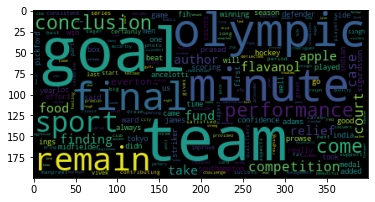

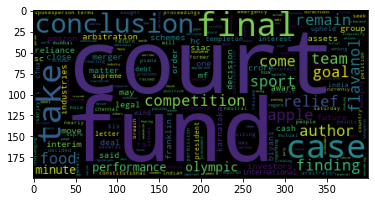

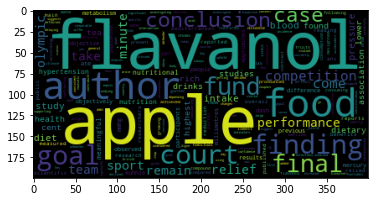

In [ ]:
wc_list = [clust_0, clust_1, clust_2]

for i in wc_list:
    plt.figure(figsize=(6,10))
    wc = WordCloud().generate(' '.join(i)) 
    plt.imshow(wc)

In [ ]:
new_text = vectorizer.transform(["I high blood pressure, so I avoid sugar"])
predicted = model.predict(new_text)
print(predicted)

[2]
